**Парная линейная регрессия**

Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и получить с помощью модели прогнозы результативного признака.

Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.

Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.

Построить кривые обучения.

In [3]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

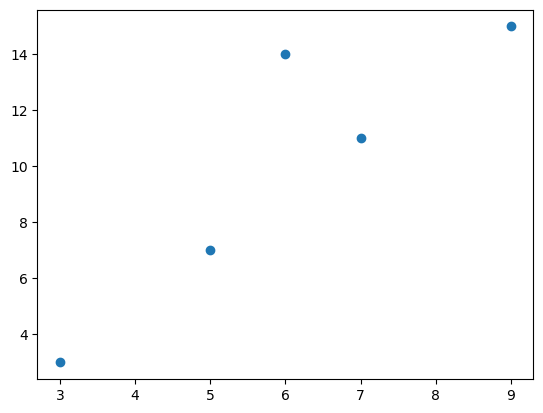

In [3]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [4]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
b1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
b0 = Y.mean() - b1*x.mean()
print("Модель линейной регрессии: Y^ = ", b0, " + ", b1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [5]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = b0 + b1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


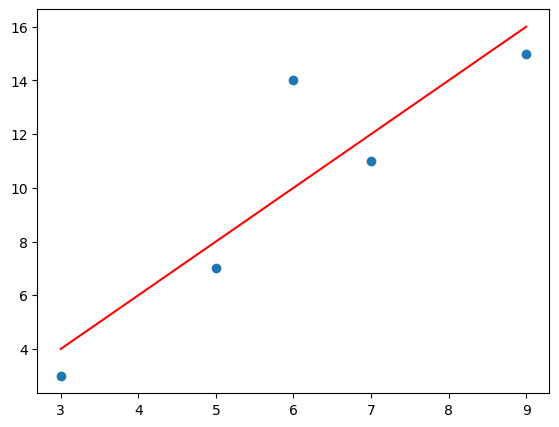

In [6]:
#Изобразим на графике исходные данные и прогнозы
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
#ax.scatter(x_space, Y_pred)

In [7]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1*x
    def MSE(self, x, Y):
        return ((self.predict(x)-Y)**2).mean()
    def fit(self, x, Y):
        alpha = 0.1
        dT_b0 = -2*sum((Y -self.predict(x)))
        dT_b1 = -2*sum((Y -self.predict(x))*x)
        self.b0 -= alpha*dT_b0
        self.b1 -= alpha*dT_b1

In [8]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print(regr.MSE(x, Y))

0
0
0
0
0
120.0


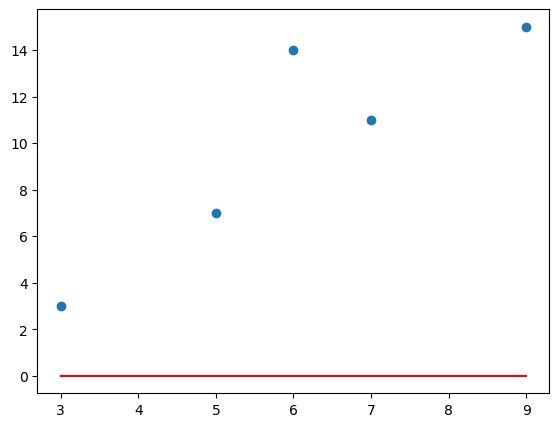

In [9]:
#Выведем прогнозы до градиентного спуска на графике
x_space = np.linspace(3, 9, 7)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

MSE после первого шага градиентного спуска:  183892.0


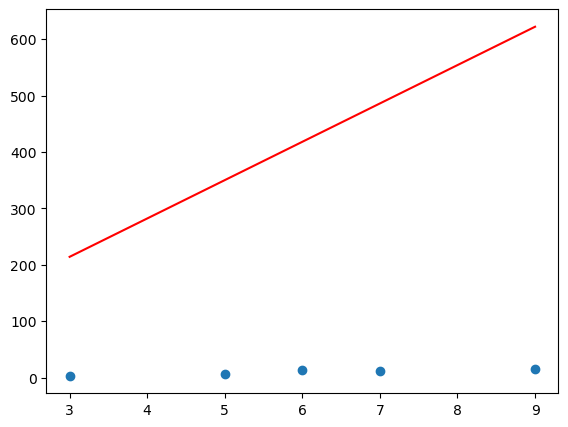

In [10]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [11]:
#Реализуем цикл градиентного спуска
class SimpleRegression(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_b0 = -2*sum((Y -self.predict(x)))
            dT_b1 = -2*sum((Y -self.predict(x))*x)
            self.b0 -= alpha*dT_b0
            self.b1 -= alpha*dT_b1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return steps, errors

In [12]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 5)

5.004697916218
8.190462542210001
11.376227168202002
9.783344855206002
14.561991794194002
MSE после градиентного спуска:  4.709918696051655


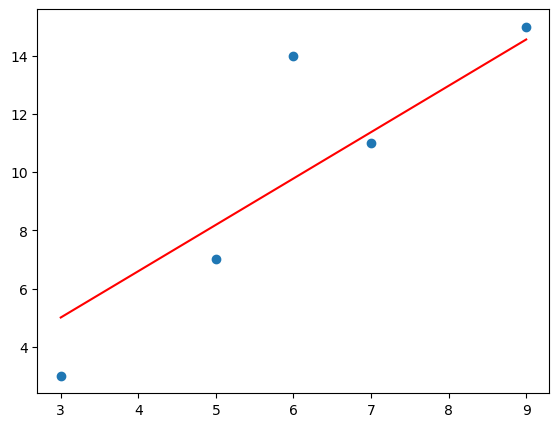

In [13]:
#Выведем график  прогнозов и вычислим MSE
print(regr.predict(3))
print(regr.predict(5))
print(regr.predict(7))
print(regr.predict(6))
print(regr.predict(9))
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

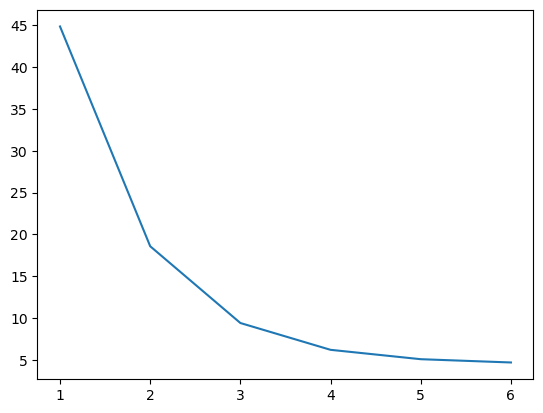

In [14]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [15]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.000028517306817


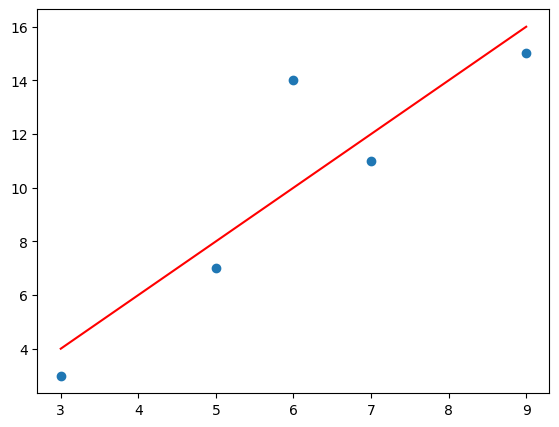

In [16]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

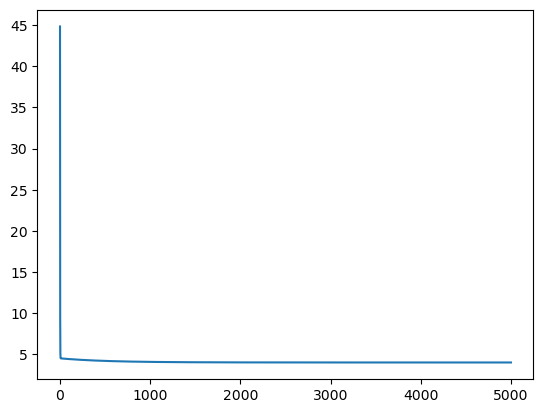

In [17]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  4.1903709155046345


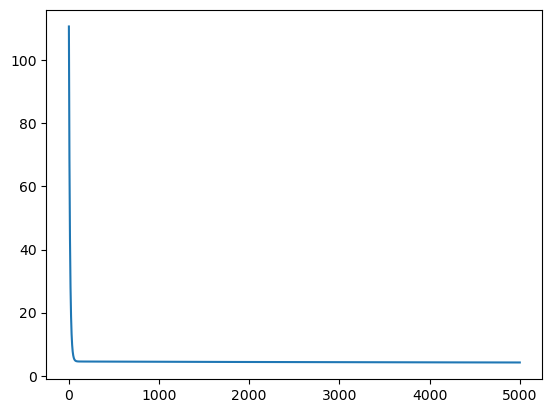

In [18]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ...,
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr = SimpleRegression()
steps, errors = regr.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
plt.figure()
plt.plot(steps, errors)

# ЛР 1

In [2]:
import seaborn as sns

In [66]:
df = pd.read_csv('Video Games.csv')
df

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales
0,2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01
1,3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31
2,4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04
3,3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08
4,1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12
...,...,...,...,...,...,...,...,...,...
4253,3996,PSP,2010,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09
4254,5720,Wii,2007,Shooter,Nintendo,3.06,1.18,0.46,1.29
4255,4579,3DS,2015,Action,FuRyu,0.00,0.00,0.00,1.06
4256,4072,GB,1996,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27


<Axes: >

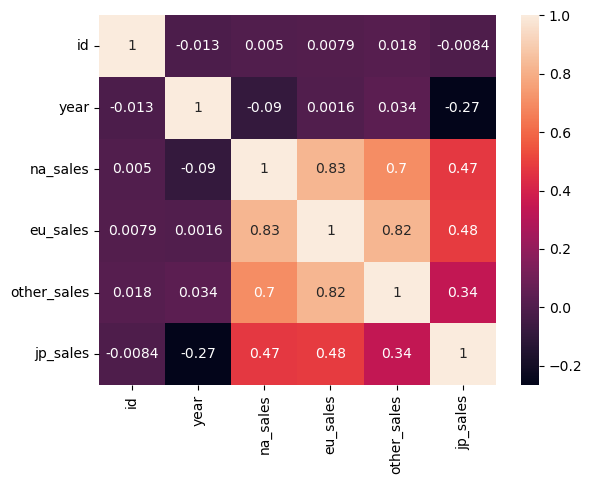

In [5]:
df_new = df.select_dtypes(exclude = 'object')
sns.heatmap(df_new.corr(), annot = True)

In [6]:
df.describe()

,id,year,na_sales,eu_sales,other_sales,jp_sales
count,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000,4258.000000
mean,3028.044152,2006.576327,0.372240,0.231038,0.073852,1.213631
std,1752.862362,6.647677,1.308406,0.829889,0.277481,0.496650
min,2.000000,1983.000000,0.000000,0.000000,0.000000,1.010000
25%,1511.250000,2003.000000,0.000000,0.000000,0.000000,1.030000
50%,3015.500000,2008.000000,0.000000,0.000000,0.000000,1.070000
75%,4537.750000,2011.000000,0.250000,0.120000,0.040000,1.197500
max,6083.000000,2017.000000,41.490000,29.020000,8.460000,11.220000


In [67]:
df['eu_sales^2'] = df['eu_sales']**2
df['other_sales^3'] = df['other_sales']**3
df

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales,eu_sales^2,other_sales^3
0,2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01,0.2704,0.015625
1,3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31,0.0000,0.000000
2,4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04,0.0000,0.000001
3,3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08,0.0000,0.000000
4,1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4253,3996,PSP,2010,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09,0.0000,0.000000
4254,5720,Wii,2007,Shooter,Nintendo,3.06,1.18,0.46,1.29,1.3924,0.097336
4255,4579,3DS,2015,Action,FuRyu,0.00,0.00,0.00,1.06,0.0000,0.000000
4256,4072,GB,1996,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27,0.0000,0.000000


In [68]:
df

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales,eu_sales^2,other_sales^3
0,2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01,0.2704,0.015625
1,3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31,0.0000,0.000000
2,4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04,0.0000,0.000001
3,3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08,0.0000,0.000000
4,1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4253,3996,PSP,2010,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09,0.0000,0.000000
4254,5720,Wii,2007,Shooter,Nintendo,3.06,1.18,0.46,1.29,1.3924,0.097336
4255,4579,3DS,2015,Action,FuRyu,0.00,0.00,0.00,1.06,0.0000,0.000000
4256,4072,GB,1996,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27,0.0000,0.000000


<Axes: >

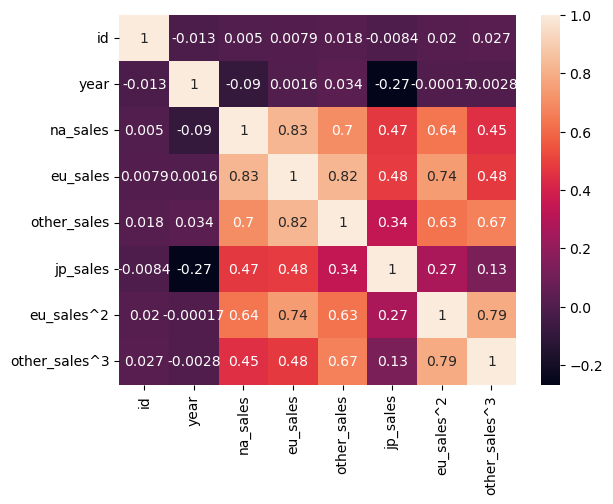

In [69]:
df_new = df.select_dtypes(exclude = 'object')
sns.heatmap(df_new.corr(), annot = True)

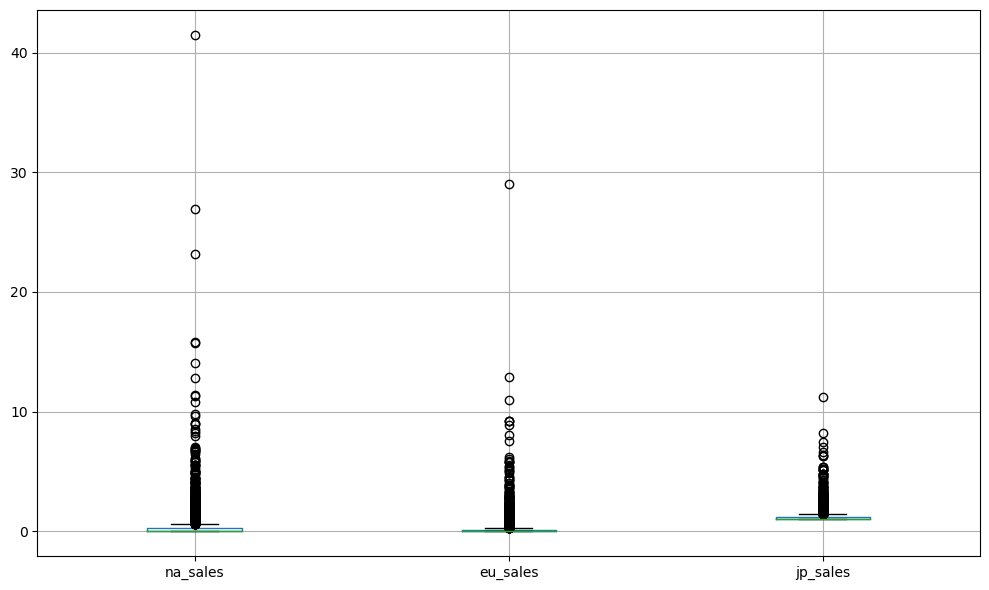

In [10]:
df_new[['na_sales', 'eu_sales', 'jp_sales']].boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

In [70]:
df = df[df.na_sales <=10]
df = df[df.eu_sales < 7]
df = df[df.jp_sales < 10]
df = df.reset_index(drop = True)
df

,id,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales,eu_sales^2,other_sales^3
0,2830,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01,0.2704,0.015625
1,3865,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31,0.0000,0.000000
2,4617,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04,0.0000,0.000001
3,3675,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08,0.0000,0.000000
4,1612,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4240,3996,PSP,2010,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09,0.0000,0.000000
4241,5720,Wii,2007,Shooter,Nintendo,3.06,1.18,0.46,1.29,1.3924,0.097336
4242,4579,3DS,2015,Action,FuRyu,0.00,0.00,0.00,1.06,0.0000,0.000000
4243,4072,GB,1996,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27,0.0000,0.000000


In [71]:
df.dtypes

id                 int64
platform          object
year               int64
genre             object
publisher         object
na_sales         float64
eu_sales         float64
other_sales      float64
jp_sales         float64
eu_sales^2       float64
other_sales^3    float64
dtype: object

In [21]:
# удаляем неинформативное поле id

In [72]:
df = df.iloc[:, 1:]
df

,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales,eu_sales^2,other_sales^3
0,PSV,2012,Racing,Electronic Arts,0.38,0.52,0.25,1.01,0.2704,0.015625
1,SNES,1996,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31,0.0000,0.000000
2,PSP,2009,Sports,Takara Tomy,0.09,0.00,0.01,1.04,0.0000,0.000001
3,DS,2007,Fighting,Takara Tomy,0.00,0.00,0.00,1.08,0.0000,0.000000
4,PSV,2016,Action,Namco Bandai Games,0.00,0.00,0.00,1.12,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...
4240,PSP,2010,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09,0.0000,0.000000
4241,Wii,2007,Shooter,Nintendo,3.06,1.18,0.46,1.29,1.3924,0.097336
4242,3DS,2015,Action,FuRyu,0.00,0.00,0.00,1.06,0.0000,0.000000
4243,GB,1996,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27,0.0000,0.000000


In [23]:
# строим регрессию без признака publisher

In [21]:
len(df['publisher'].unique())

269

In [22]:
df['year']

0       2012
1       1996
2       2009
3       2007
4       2016
        ... 
4240    2010
4241    2007
4242    2015
4243    1996
4244    1992
Name: year, Length: 4245, dtype: int64

In [73]:
year = (df['year'] - df['year'].min ())/(df['year'].max() - df['year'].min())
year.values

array([0.85294118, 0.38235294, 0.76470588, ..., 0.94117647, 0.38235294,
       0.26470588])

In [74]:
df['year'] = year.values
df

,platform,year,genre,publisher,na_sales,eu_sales,other_sales,jp_sales,eu_sales^2,other_sales^3
0,PSV,0.852941,Racing,Electronic Arts,0.38,0.52,0.25,1.01,0.2704,0.015625
1,SNES,0.382353,Role-Playing,ASCII Entertainment,0.00,0.00,0.00,1.31,0.0000,0.000000
2,PSP,0.764706,Sports,Takara Tomy,0.09,0.00,0.01,1.04,0.0000,0.000001
3,DS,0.705882,Fighting,Takara Tomy,0.00,0.00,0.00,1.08,0.0000,0.000000
4,PSV,0.970588,Action,Namco Bandai Games,0.00,0.00,0.00,1.12,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...
4240,PSP,0.794118,Adventure,Tecmo Koei,0.00,0.00,0.00,1.09,0.0000,0.000000
4241,Wii,0.705882,Shooter,Nintendo,3.06,1.18,0.46,1.29,1.3924,0.097336
4242,3DS,0.941176,Action,FuRyu,0.00,0.00,0.00,1.06,0.0000,0.000000
4243,GB,0.382353,Role-Playing,ChunSoft,0.00,0.00,0.00,1.27,0.0000,0.000000


In [26]:
# вводим dummy переменные

In [75]:
df = pd.get_dummies(df, prefix=['platform', 'genre', 'publisher'], dtype="float64")
df

,year,na_sales,eu_sales,other_sales,jp_sales,eu_sales^2,other_sales^3,platform_3DO,platform_3DS,platform_DC,...,publisher_Yacht Club Games,publisher_Yamasa Entertainment,publisher_Yeti,publisher_Yuke's,publisher_Yumedia,publisher_Zenrin,publisher_Zoo Digital Publishing,publisher_Zushi Games,publisher_dramatic create,publisher_imageepoch Inc.
0,0.852941,0.38,0.52,0.25,1.01,0.2704,0.015625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382353,0.00,0.00,0.00,1.31,0.0000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.09,0.00,0.01,1.04,0.0000,0.000001,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705882,0.00,0.00,0.00,1.08,0.0000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.970588,0.00,0.00,0.00,1.12,0.0000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,0.794118,0.00,0.00,0.00,1.09,0.0000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,0.705882,3.06,1.18,0.46,1.29,1.3924,0.097336,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4242,0.941176,0.00,0.00,0.00,1.06,0.0000,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4243,0.382353,0.00,0.00,0.00,1.27,0.0000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
Y = df['jp_sales']
X = df.drop(['jp_sales'], axis = 1)
X

,year,na_sales,eu_sales,other_sales,eu_sales^2,other_sales^3,platform_3DO,platform_3DS,platform_DC,platform_DS,...,publisher_Yacht Club Games,publisher_Yamasa Entertainment,publisher_Yeti,publisher_Yuke's,publisher_Yumedia,publisher_Zenrin,publisher_Zoo Digital Publishing,publisher_Zushi Games,publisher_dramatic create,publisher_imageepoch Inc.
0,0.852941,0.38,0.52,0.25,0.2704,0.015625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382353,0.00,0.00,0.00,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.09,0.00,0.01,0.0000,0.000001,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705882,0.00,0.00,0.00,0.0000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.970588,0.00,0.00,0.00,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,0.794118,0.00,0.00,0.00,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,0.705882,3.06,1.18,0.46,1.3924,0.097336,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4242,0.941176,0.00,0.00,0.00,0.0000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4243,0.382353,0.00,0.00,0.00,0.0000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
Y

0       1.01
1       1.31
2       1.04
3       1.08
4       1.12
        ... 
4240    1.09
4241    1.29
4242    1.06
4243    1.27
4244    1.06
Name: jp_sales, Length: 4245, dtype: float64

определитель матрицы $X^T \cdot X$

In [29]:
M = X.T @ X
np.linalg.det(M)

-3.605916151987484e+195

In [30]:
# вектор оценок

In [31]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y
B

0     -5.748251e+01
1      3.091585e+00
2      1.145443e+01
3     -3.870078e+01
4      1.550863e+16
           ...     
310   -4.666934e+00
311   -3.193945e+00
312   -5.738896e+00
313   -5.353955e+00
314   -3.274827e+00
Length: 315, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.67, 
                                                    random_state=42)

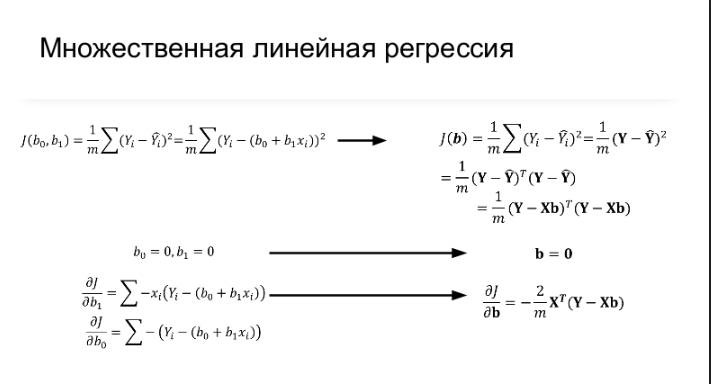

In [78]:
class MultReg(object):

    def __init__(self, learning_rate=0.01, num_iterations=100000, epsylon = 0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.b = None
        self.epsylon = epsylon

    def fit(self, X_train, y_train):
        num_samples, num_features = X_train.shape
        self.b = np.zeros(num_features + 1)

        X_b = np.c_[np.ones(len(X_train)), X_train]

        steps, errors = [], []
        step = 0
        for _ in range(self.num_iterations):
            gradients = (2/num_samples) * X_b.T.dot(X_b.dot(self.b) - y_train)
            self.b -= self.learning_rate * gradients
            new_error = self.mse(X_train, y_train)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < self.epsylon:
                break
        return steps, errors

    def predict(self, X_test):
        X_test = np.c_[np.ones((len(X_test), 1)), X_test]
        y_predict = np.dot(X_test, self.b)
        return y_predict

    def mse(self, X_test, y_test):
        return ((y_test - self.predict(X_test))**2).mean()

    def mae(self, X_test, y_test):
        return abs(y_test - self.predict(X_test)).mean()

    def mape(self, X_test, y_test):
        return abs((y_test - self.predict(X_test))/y_test).mean()

In [79]:
m_reg = MultReg(epsylon=0.15)

In [80]:
steps, errors = m_reg.fit(X, Y)

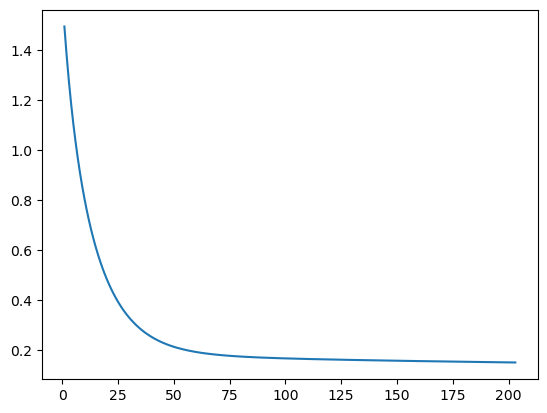

In [81]:
plt.figure()
plt.plot(steps, errors)

In [82]:
m_reg.mse(X, Y)

0.1499708862366947

In [83]:
m_reg.mape(X, Y)

0.14306373492096824